In [17]:
import pandas as pd
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

In [13]:
def create_num_to_num_model(df,target,predictor):

    mu_hyper_prior = df[target].mean()
    sd_hyper_prior = df[target].std()
    xbar = df[predictor].mean()

    
    with pm.Model() as model:

        a = pm.Normal("a", mu=mu_hyper_prior, sigma=sd_hyper_prior)
        b = pm.Lognormal("b", mu=0, sigma=1)
        sigma = pm.Uniform("sigma", 0, 50)

        mu = pm.Deterministic(f'mu_{target}', a + b * (df[predictor] - xbar))

        target_var = pm.Normal(target, mu=mu, sigma=sigma, observed=df[target])

        # The next lines is doing the fitting and sampling all at once.
        idata = pm.sample(1000, tune=1000)
        pm.sample_posterior_predictive(idata, extend_inferencedata=True)

    # post = az.extract(idata)
    # post_predictive = az.extract(idata.posterior_predictive)
    hdi_prob = 0.9

    df[f'mu_{target}_lower'] = az.hdi(idata, hdi_prob=hdi_prob)[f'mu_{target}'][:,0]
    df[f'mu_{target}_upper'] = az.hdi(idata, hdi_prob=hdi_prob)[f'mu_{target}'][:,1]

    df[f'{target}_lower'] = az.hdi(idata.posterior_predictive, hdi_prob=hdi_prob)[target][:,0]
    df[f'{target}_upper'] = az.hdi(idata.posterior_predictive, hdi_prob=hdi_prob)[target][:,1]

    return df,idata



In [14]:
df = pd.read_csv('~/data/penguins/penguins_size.csv')

target = 'body_mass_g'
predictor = 'culmen_length_mm'

df = df.dropna()
df,idata = create_num_to_num_model(df,target,predictor)

/home/guyyos/miniconda3/envs/tusha-env/lib/python3.10/site-packages/arviz/plots/hdiplot.py:156: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


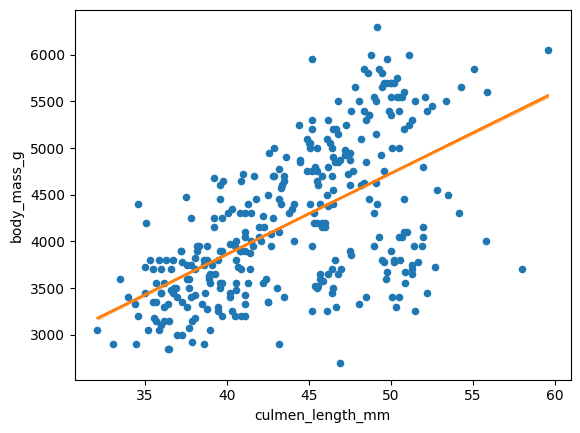

In [19]:
post = az.extract(idata)
df.plot(predictor, target, kind='scatter')
plt.plot(df[predictor], post.mean('sample')[f'mu_{target}'], 'C1')

graph = az.plot_hdi(df[predictor], post[f'mu_{target}'].transpose());

In [15]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,mu_body_mass_g_lower,mu_body_mass_g_upper,body_mass_g_lower,body_mass_g_upper
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,3778.388283,3790.552842,3706.466255,3868.268287
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,3813.298070,3824.964966,3730.289744,3894.456301
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,3882.736244,3893.662004,3813.221490,3975.399188
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,3568.178176,3583.425625,3501.087528,3666.440864
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,3795.763286,3807.667387,3721.097146,3887.947768
...,...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,4482.451952,4492.763706,4403.045532,4570.069017
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,4447.838716,4457.826709,4377.761639,4536.371293
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,4758.264328,4772.215674,4680.690592,4844.281252
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,4309.177323,4318.140886,4232.358057,4392.939851


In [20]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,mu_body_mass_g_lower,mu_body_mass_g_upper,body_mass_g_lower,body_mass_g_upper
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,3778.388283,3790.552842,3706.466255,3868.268287
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,3813.298070,3824.964966,3730.289744,3894.456301
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,3882.736244,3893.662004,3813.221490,3975.399188
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,3568.178176,3583.425625,3501.087528,3666.440864
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,3795.763286,3807.667387,3721.097146,3887.947768
...,...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,4482.451952,4492.763706,4403.045532,4570.069017
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,4447.838716,4457.826709,4377.761639,4536.371293
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,4758.264328,4772.215674,4680.690592,4844.281252
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,4309.177323,4318.140886,4232.358057,4392.939851


In [1]:
import pymc as pm
import numpy as np
import arviz as az
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.signal import savgol_filter
import pytensor.tensor as at



def standardize_vec(unstd_vec,mean,std):
    return (unstd_vec-mean)/std

def unstandardize_vec(std_vec,mean,std):
    return std_vec*std+mean

def create_num_to_nums_model(df,target,predictors):

    mu_hyper_prior = 0 #df[target].mean()
    sd_hyper_prior = 1 #df[target].std()
        
    with pm.Model(coords={"predictors": predictors}) as model:
        pred = pm.MutableData("pred", df[predictors].values)

        a = pm.Normal("a", mu=mu_hyper_prior, sigma=sd_hyper_prior)
        b = pm.Lognormal("b", mu=0, sigma=1,dims="predictors")
        sigma = pm.Uniform("sigma", 0, 50)

        mu = pm.Deterministic(f'mu_{target}', a + at.dot(pred,b))

        target_var = pm.Normal(target, mu=mu, sigma=sigma, shape=mu.shape, observed=df[target])

        # The next lines is doing the fitting and sampling all at once.
        idata = pm.sample(1000, tune=1000)
        pm.sample_posterior_predictive(idata, extend_inferencedata=True)
        
    post = az.extract(idata)

    return model,idata


def calc_counterfactual_predictor(df,model,idata,target,predictors,active_predictor):
    num_points = 100
    df_counterfactual = DataFrame({active_predictor:np.linspace(df[active_predictor].min(), df[active_predictor].max(),num_points)})
    for p in predictors:
        if p != active_predictor:
            df_counterfactual[p] = 0

    
    with model:
        # # update values of predictors:
        pm.set_data({"pred": df_counterfactual[predictors].values})
        # use the updated values and predict outcomes and probabilities:
        idata_2 = pm.sample_posterior_predictive(
            idata,
            var_names=[target,f'mu_{target}'],
            return_inferencedata=True,
            predictions=True,
        )
        
    target_hdi = az.hdi(idata_2.predictions)[target]
    mu_hdi = az.hdi(idata_2.predictions)[f'mu_{target}']
    mu_mean = az.extract(idata_2.predictions).mean('sample')[f'mu_{target}']

    return target_hdi,mu_hdi,mu_mean,df_counterfactual[active_predictor]


def create_model(df,target,predictors):

    features = predictors + [target]

    feature_means = {f:df[f].mean() for f in features}
    feature_stds = {f:df[f].std() for f in features}

    for f in features:
        df[f] = standardize_vec(df[f],feature_means[f],feature_stds[f])

    model,idata = create_num_to_nums_model(df,target,predictors)

    def unstand(predictor,target_hdi,mu_hdi,mu_mean,predictor_vals):
        target_hdi = unstandardize_vec(target_hdi,feature_means[target],feature_stds[target])
        mu_hdi = unstandardize_vec(mu_hdi,feature_means[target],feature_stds[target])
        mu_mean = unstandardize_vec(mu_mean,feature_means[target],feature_stds[target])
        predictor_vals = unstandardize_vec(predictor_vals,feature_means[predictor],feature_stds[predictor])
        return (target_hdi,mu_hdi,mu_mean,predictor_vals)

    def smooth(predictor,target_hdi,mu_hdi,mu_mean,predictor_vals):
        target_hdi = savgol_filter(target_hdi, axis=0, window_length=55, polyorder=2)
        mu_hdi = savgol_filter(mu_hdi, axis=0, window_length=55, polyorder=2)
        mu_mean = savgol_filter(mu_mean, axis=0, window_length=55, polyorder=2)
        target_hdi = savgol_filter(target_hdi, axis=0, window_length=55, polyorder=2)
        return (target_hdi,mu_hdi,mu_mean,predictor_vals)


    all_res = {active_predictor:calc_counterfactual_predictor(df,model,idata,target,predictors,active_predictor) \
                                                    for active_predictor in predictors}

    all_res = {predictor:unstand(predictor,target_hdi,mu_hdi,mu_mean,predictor_vals) for \
               predictor,(target_hdi,mu_hdi,mu_mean,predictor_vals) in all_res.items()}
    all_res = {predictor:smooth(predictor,target_hdi,mu_hdi,mu_mean,predictor_vals) for \
               predictor,(target_hdi,mu_hdi,mu_mean,predictor_vals) in all_res.items()}

    return all_res

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [63]:

import plotly.graph_objects as go
import plotly.express as px

def create_scatter_with_reg_hdi_lines(df,target,predictor,other_predictor,target_lower,target_higher,mu_lower,mu_higher,mu_mean,predictor_vals):

    df[f'scaled_[{other_predictor}]'] = df[other_predictor].apply(lambda x: 5+3*(x-df[other_predictor].mean())/df[other_predictor].std())
    df[f'scaled_[{other_predictor}]'] = df[f'scaled_[{other_predictor}]']-df[f'scaled_[{other_predictor}]'].min()

    fig = px.scatter(df,  x=predictor, y=target, color=None, size=f'scaled_[{other_predictor}]',
                    trendline="ols")

    # fig = go.Figure()
    # fig.add_trace(go.Scatter(x=df[predictor], y=df[target],
    #     name="items",fill=None,mode='markers'
    #     ))


    fig.add_trace(go.Scatter(x=predictor_vals, y=target_lower,
        showlegend=False,
        fill=None,
        mode='lines',
        line=dict(width=0.5, color='rgb(184, 247, 212)'),
        ))
    fig.add_trace(go.Scatter(
    x=predictor_vals, y=target_higher,
        name="hdi",
        fill='tonexty', # fill area between trace0 and trace1
        mode='lines', line=dict(width=0.5, color='rgb(184, 247, 212)'),))


    fig.add_trace(go.Scatter(x=predictor_vals, y=mu_higher,
        showlegend=False,
        fill=None,
        mode='lines',
        line=dict(width=0.5, color='rgb(111, 100, 255)'),
        ))
    fig.add_trace(go.Scatter(x=predictor_vals, y=mu_lower,
        name="trend_range",
        fill='tonexty', # fill area between trace0 and trace1
        mode='lines', line=dict(width=0.5, color='rgb(111, 100, 255)')))


    fig.add_trace(go.Scatter(x=predictor_vals, y=mu_mean,
        name="trend",
        mode='lines', line_color='black'))
    
    return fig

In [64]:
def create_plots_with_reg_hdi_lines(df,target,predictors,all_res):
    figs = {}

    for predictor in predictors:
        target_lower = all_res[predictor][0][:,0]
        target_higher = all_res[predictor][0][:,1]

        mu_lower = all_res[predictor][1][:,0]
        mu_higher = all_res[predictor][1][:,1]

        mu_mean = all_res[predictor][2]

        predictor_vals = all_res[predictor][3]

        other_predictor = list(set(predictors).difference(set([predictor])))[0]
        figs[predictor] = create_scatter_with_reg_hdi_lines(df,target,predictor,other_predictor,target_lower,target_higher,mu_lower,mu_higher,mu_mean,predictor_vals)

    return figs



In [50]:
df = pd.read_csv('~/data/penguins/penguins_size.csv')
df = df.dropna()

target = 'culmen_length_mm'
predictors = ['culmen_depth_mm','flipper_length_mm']
# predictors = ['culmen_depth_mm']


all_res = create_model(df.copy(),target,predictors)

In [65]:
figs = create_plots_with_reg_hdi_lines(df,target,predictors,all_res)

ValueError: 
    Invalid element(s) received for the 'size' property of scatter.marker
        Invalid elements include: [-0.7797673417571991, -1.2076610117443218, -0.35187367177007545]

    The 'size' property is a number and may be specified as:
      - An int or float in the interval [0, inf]
      - A tuple, list, or one-dimensional numpy array of the above

In [52]:
for p,f in figs.items():
    print(f'{p}')
    f.show()
    print('---------------------')

culmen_depth_mm


---------------------
flipper_length_mm


---------------------


In [258]:
all_res

{'culmen_depth_mm': <xarray.DataArray 'culmen_length_mm' (culmen_length_mm_dim_2: 100, hdi: 2)>
 array([[-1.99495543,  0.86723883],
        [-1.74902632,  0.99214204],
        [-1.74478522,  1.07246929],
        [-1.87749096,  0.91694001],
        [-1.84363475,  0.94024689],
        [-1.81686257,  0.96783367],
        [-1.82326961,  0.95494786],
        [-1.68013556,  1.02643348],
        [-1.81824399,  1.05528032],
        [-1.76200146,  1.03702992],
        [-1.74382843,  1.08373079],
        [-1.76502883,  0.99741361],
        [-1.67948423,  1.07472471],
        [-1.83805307,  0.97781003],
        [-1.62481033,  1.10575959],
        [-1.71443465,  1.00377182],
        [-1.62933615,  1.07672271],
        [-1.75161547,  1.10349309],
        [-1.65088495,  1.1084096 ],
        [-1.59206704,  1.26868211],
 ...
        [-1.08709554,  1.62727086],
        [-1.13171313,  1.77926292],
        [-1.10911537,  1.66053731],
        [-1.04963006,  1.70704556],
        [-1.16818056,  1.61775526],

In [253]:
az.hdi(idata_2.predictions)[target]

<xarray.DataArray 'culmen_length_mm' (culmen_length_mm_dim_2: 100, hdi: 2)>
array([[-1.88876589,  0.98749975],
       [-1.98246507,  0.85967248],
       [-1.83172822,  0.98826366],
       [-1.8715554 ,  0.88313321],
       [-1.84161978,  0.92722273],
       [-1.85639754,  0.91614797],
       [-1.79670018,  1.11533536],
       [-1.83546236,  0.99417734],
       [-1.79959335,  0.96514216],
       [-1.73196788,  0.94581692],
       [-1.75567113,  1.10205099],
       [-1.6551169 ,  1.10079338],
       [-1.79111476,  0.98921636],
       [-1.63913731,  1.11454271],
       [-1.85155237,  0.97681834],
       [-1.65938762,  1.09694292],
       [-1.54074241,  1.19243632],
       [-1.62910984,  1.08653486],
       [-1.74493681,  1.10347479],
       [-1.57170223,  1.259983  ],
...
       [-1.081554  ,  1.72796465],
       [-1.09621182,  1.66395185],
       [-1.15260926,  1.66822918],
       [-1.07101577,  1.71377528],
       [-1.09217265,  1.68779721],
       [-0.94555394,  1.83282544],
       [-1.0220408 ,  1.77414342],
       [-0.99545717,  1.83262925],
       [-0.96046222,  1.85174911],
       [-0.97752228,  1.88721209],
       [-1.02409354,  1.74587365],
       [-1.02045633,  1.77857588],
       [-1.04896615,  1.75510054],
       [-0.9968323 ,  1.82626963],
       [-0.92971922,  1.83904595],
       [-1.01112446,  1.84883752],
       [-0.86453104,  1.85603804],
       [-0.80547651,  1.96317261],
       [-1.04290138,  1.80796721],
       [-0.99848788,  1.76297501]])
Coordinates:
  * culmen_length_mm_dim_2  (culmen_length_mm_dim_2) int64 0 1 2 3 ... 97 98 99
  * hdi                     (hdi) <U6 'lower' 'higher'

In [240]:
az.extract(idata_2,'predictions')[target]

<xarray.DataArray 'culmen_length_mm' (culmen_length_mm_dim_2: 100, sample: 2000)>
array([[-0.32403697, -1.60363878, -0.68913821, ..., -0.74841935,
        -0.45285383, -0.00631261],
       [-0.50193261, -0.44240316,  0.27316731, ..., -2.03210669,
        -0.62565781, -0.44475483],
       [ 0.33146199, -0.91088535, -0.79853918, ..., -0.12254416,
        -0.27733504, -0.17837094],
       ...,
       [-0.71697841,  0.8177932 ,  1.32146255, ..., -0.40714712,
         1.50945104, -0.6451882 ],
       [ 0.66318059, -0.0431605 ,  1.0819378 , ...,  0.65031499,
         2.44992808,  0.23345284],
       [ 0.87382269,  1.25905737,  0.31137997, ...,  0.89640418,
         1.15305804,  1.00511409]])
Coordinates:
  * culmen_length_mm_dim_2  (culmen_length_mm_dim_2) int64 0 1 2 3 ... 97 98 99
  * sample                  (sample) object MultiIndex
  * chain                   (sample) int64 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1
  * draw                    (sample) int64 0 1 2 3 4 5 ... 995 996 997 998 999

In [107]:
idata_prev

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

In [42]:
import pymc as pm
import numpy as np
import arviz as az
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.signal import savgol_filter


def calc_smooth_hdi_line(x,hdi_data):
    x_data = np.linspace(x.min(), x.max(), 200)
    x_data[0] = (x_data[0] + x_data[1]) / 2
    hdi_interp = griddata(x, hdi_data, x_data)
    y_data = savgol_filter(hdi_interp, axis=0, window_length=55, polyorder=2)

    return x_data,y_data

hdi_prob = 0.9

idata_hdi = az.hdi(idata, hdi_prob=hdi_prob)
post_pred_hdi = az.hdi(idata.posterior_predictive, hdi_prob=hdi_prob)

vals = idata_hdi[f'mu_{target}'][:,0]

vals


<xarray.DataArray 'mu_culmen_length_mm' (mu_culmen_length_mm_dim_0: 334)>
array([-1.0489467 , -0.91316919, -0.30739302, -0.29095877, -0.33176907,
       -1.15882698, -0.14979245, -1.13046178, -0.22897924,  0.13055063,
       -0.91787575, -0.20538831,  0.04705658, -0.90319706, -0.04480143,
       -1.52246414, -1.10778851, -0.52490048, -0.8758179 , -1.31148243,
       -0.66983586, -0.94354007, -0.78338072, -1.60280178, -1.08550273,
       -1.50358731, -1.30529146, -0.73744694, -0.84769261, -0.43075976,
        0.02369751, -0.38732142, -1.12681161, -0.97734962, -0.8223418 ,
       -1.07621526, -0.26259845, -0.77782556, -0.08729101, -1.04300851,
       -0.51026881, -0.95460338, -0.6086806 , -0.22897924, -0.87080642,
       -0.61606449, -0.6086806 ,  0.10949969, -0.75591286, -0.47092893,
       -0.90247434, -0.3376615 , -1.33124981, -0.24704207, -1.04300851,
       -0.02525545, -1.03205612, -0.45937753, -1.07733939, -0.47713981,
       -0.54445331, -0.59468087, -0.77869022, -0.01455155, -0.48655756,
       -0.55766465, -0.34378762, -0.10808084, -0.65987133, -0.25068236,
       -0.69430289, -0.79221397, -1.03376147, -0.19437423, -0.76220496,
       -0.2929026 , -0.68017644, -0.27844468, -0.5625028 , -0.1496888 ,
       -0.4380253 , -0.58757474, -0.52490048, -0.51026881,  0.08013977,
        0.2459352 , -1.02067703, -0.81542682, -0.86799365,  0.47994359,
       -0.530564  , -0.19561271, -1.58343455, -0.42502888, -0.49219593,
        0.31098922, -1.29642986, -0.38732142, -0.35652646, -0.84769261,
...
        0.36738546,  0.24134622,  0.52503597,  0.16060537,  0.43389729,
        0.4182282 ,  0.04076453,  0.72649003,  0.84059673, -0.02714266,
       -0.09876659,  1.42568713,  0.65614561,  0.84592475,  0.11973017,
        0.89051509, -0.1741359 ,  0.1386103 , -0.16712178,  1.06875408,
       -0.02920933,  0.47395178,  0.90506755,  0.38670183, -0.00746853,
        1.04675726,  0.07990381,  0.52503597,  0.03279217,  0.587444  ,
        0.05507681,  0.95616585,  0.45846843,  0.74072747, -0.13554168,
        0.68501328, -0.03698747,  0.94031802, -0.15146459,  0.7262143 ,
        0.21561818,  1.34209937,  0.53949428,  1.4063863 ,  1.29020818,
        0.57383031,  0.85387123,  0.47395178,  0.82482281,  0.82482281,
        0.50112003,  0.47395178,  1.31953343, -0.02714266,  0.84592475,
        0.25371695,  1.00218662,  0.18432203,  0.82482281,  0.20009024,
        0.99867037,  0.07759447,  1.3649777 ,  0.50187978,  0.4807209 ,
        0.11011922,  1.42568713,  0.58144334,  1.33264325,  0.18432203,
        1.02822484,  0.33917294,  1.08453254,  0.57871749,  0.73732198,
       -0.33241585,  1.11377312,  0.63241638,  1.32428417,  0.49105592,
        1.11219832,  0.56200172,  0.10804565,  0.74403486, -0.09705545,
        0.1091021 ,  0.50050487,  1.26094112,  0.33708389,  1.35235059,
        0.42161739,  1.31953343,  0.62316782,  0.93345137,  0.18153166,
        0.3354556 ,  0.88538421,  0.2306255 ,  0.46196182])
Coordinates:
  * mu_culmen_length_mm_dim_0  (mu_culmen_length_mm_dim_0) int64 0 1 ... 332 333
    hdi                        <U6 'lower'

In [89]:
np.linspace(0,1,5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [102]:
import xarray as xr
import numpy as np
num_vals = 100
predictor_vals = xr.DataArray(np.linspace(0,1,num_vals), [("x", [i for i in range(num_vals)])])
predictor_vals

<xarray.DataArray (x: 100)>
array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747475,
       0.75757576, 0.76767677, 0.77777778, 0.78787879, 0.7979798 ,
       0.80808081, 0.81818182, 0.82828283, 0.83838384, 0.84848485,
       0.85858586, 0.86868687, 0.87878788, 0.88888889, 0.8989899 ,
       0.90909091, 0.91919192, 0.92929293, 0.93939394, 0.94949495,
       0.95959596, 0.96969697, 0.97979798, 0.98989899, 1.        ])
Coordinates:
  * x        (x) int64 0 1 2 3 4 5 6 7 8 9 10 ... 90 91 92 93 94 95 96 97 98 99

In [104]:
predictor = predictors[0]
predictor_vals*post['b'].sel(predictors=predictor)

<xarray.DataArray (x: 100, sample: 2000)>
array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00271061, 0.00213621, 0.0019809 , ..., 0.00239577, 0.0023254 ,
        0.00208523],
       [0.00542121, 0.00427242, 0.0039618 , ..., 0.00479155, 0.0046508 ,
        0.00417046],
       ...,
       [0.26292872, 0.20721222, 0.19214741, ..., 0.23238994, 0.22556373,
        0.20226713],
       [0.26563932, 0.20934843, 0.19412831, ..., 0.23478571, 0.22788913,
        0.20435236],
       [0.26834993, 0.21148464, 0.19610921, ..., 0.23718149, 0.23021453,
        0.20643759]])
Coordinates:
  * x           (x) int64 0 1 2 3 4 5 6 7 8 9 ... 90 91 92 93 94 95 96 97 98 99
    predictors  <U17 'culmen_depth_mm'
  * sample      (sample) object MultiIndex
  * chain       (sample) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1 1 1
  * draw        (sample) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999

In [69]:
idata_hdi['b'].sel(predictors='culmen_depth_mm',hdi='lower').values

array(0.155472)

In [95]:
a = xr.DataArray([1, 2], [("x", ["a", "b"])])

a

b = xr.DataArray([-1, -2, -3], [("y", [10, 20, 30])])

a,b

(<xarray.DataArray (x: 2)>
 array([1, 2])
 Coordinates:
   * x        (x) <U1 'a' 'b',
 <xarray.DataArray (y: 3)>
 array([-1, -2, -3])
 Coordinates:
   * y        (y) int64 10 20 30)

In [94]:
a*b

<xarray.DataArray (x: 2, y: 3)>
array([[-1, -2, -3],
       [-2, -4, -6]])
Coordinates:
  * x        (x) <U1 'a' 'b'
  * y        (y) int64 10 20 30

In [37]:
az.summary(idata, round_to=2)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,0.00,0.04,-0.07,0.08,0.0,0.0,2180.89,1261.83,1.0
b[culmen_depth_mm],0.23,0.05,0.14,0.32,0.0,0.0,1463.20,1039.14,1.0
b[flipper_length_mm],0.78,0.05,0.69,0.87,0.0,0.0,1406.43,1379.97,1.0
sigma,0.74,0.03,0.69,0.80,0.0,0.0,1600.98,1282.40,1.0
mu_culmen_length_mm[0],-0.94,0.07,-1.06,-0.79,0.0,0.0,1848.81,1475.99,1.0
...,...,...,...,...,...,...,...,...,...
mu_culmen_length_mm[329],0.32,0.08,0.16,0.47,0.0,0.0,2126.74,1199.63,1.0
mu_culmen_length_mm[330],0.45,0.07,0.30,0.58,0.0,0.0,2327.00,1285.58,1.0
mu_culmen_length_mm[331],1.00,0.07,0.86,1.13,0.0,0.0,2135.95,1524.68,1.0
mu_culmen_length_mm[332],0.34,0.06,0.21,0.46,0.0,0.0,2279.17,1285.22,1.0


In [31]:
az.summary(idata, round_to=2)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,-0.00,0.04,-0.08,0.07,0.0,0.0,1964.48,1439.34,1.0
b[culmen_depth_mm],0.23,0.05,0.13,0.32,0.0,0.0,1413.61,1317.57,1.0
b[flipper_length_mm],0.78,0.05,0.68,0.87,0.0,0.0,1196.45,1260.58,1.0
sigma,0.74,0.03,0.69,0.80,0.0,0.0,1668.45,1434.72,1.0
mu_culmen_length_mm[0],-0.94,0.07,-1.07,-0.80,0.0,0.0,2048.97,1408.28,1.0
...,...,...,...,...,...,...,...,...,...
mu_culmen_length_mm[329],0.32,0.08,0.17,0.46,0.0,0.0,2152.43,1717.08,1.0
mu_culmen_length_mm[330],0.45,0.07,0.32,0.58,0.0,0.0,2334.65,1682.72,1.0
mu_culmen_length_mm[331],1.00,0.07,0.87,1.14,0.0,0.0,1763.32,1665.90,1.0
mu_culmen_length_mm[332],0.34,0.06,0.23,0.46,0.0,0.0,2213.33,1694.68,1.0


In [ ]:


with pm.Model(coords={"predictors": predictors}) as test_score_model:

    # Prior on error SD
    sigma = pm.HalfNormal("sigma", 25)

    # Global shrinkage prior
    tau = pm.HalfStudentT("tau", 2, D0 / (D - D0) * sigma / np.sqrt(N))
    # Local shrinkage prior
    lam = pm.HalfStudentT("lam", 2, dims="predictors")
    c2 = pm.InverseGamma("c2", 1, 0.1)
    z = pm.Normal("z", 0.0, 1.0, dims="predictors")
    # Shrunken coefficients
    beta = pm.Deterministic(
        "beta", z * tau * lam * at.sqrt(c2 / (c2 + tau**2 * lam**2)), dims="predictors"
    )
    # No shrinkage on intercept
    beta0 = pm.Normal("beta0", 100, 25.0)

    scores = pm.Normal("scores", beta0 + at.dot(X.values, beta), sigma, observed=y.values)
